<a href="https://colab.research.google.com/github/Gobals89/Kaggle/blob/main/Spaceship_Titanic_EDA_and_Catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split

In [3]:
!pip install catboost
!pip install catboost shap ipywidjets sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.8 MB/s 
ERROR: Could not find a version that satisfies the requirement ipywidjets (from versions: none)
ERROR: No matching distribution found for ipywidjets


In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [7]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4186.0,28.658146,14.179072,0.0,19.0,26.0,37.0,79.0
RoomService,4195.0,219.266269,607.011289,0.0,0.0,0.0,53.0,11567.0
FoodCourt,4171.0,439.484296,1527.663045,0.0,0.0,0.0,78.0,25273.0
ShoppingMall,4179.0,177.295525,560.821123,0.0,0.0,0.0,33.0,8292.0
Spa,4176.0,303.052443,1117.186015,0.0,0.0,0.0,50.0,19844.0
VRDeck,4197.0,310.710031,1246.994742,0.0,0.0,0.0,36.0,22272.0


Make a new column with total purshases of passengers

In [8]:
train_df['total_bill'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [9]:
test_df['total_bill'] = test_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

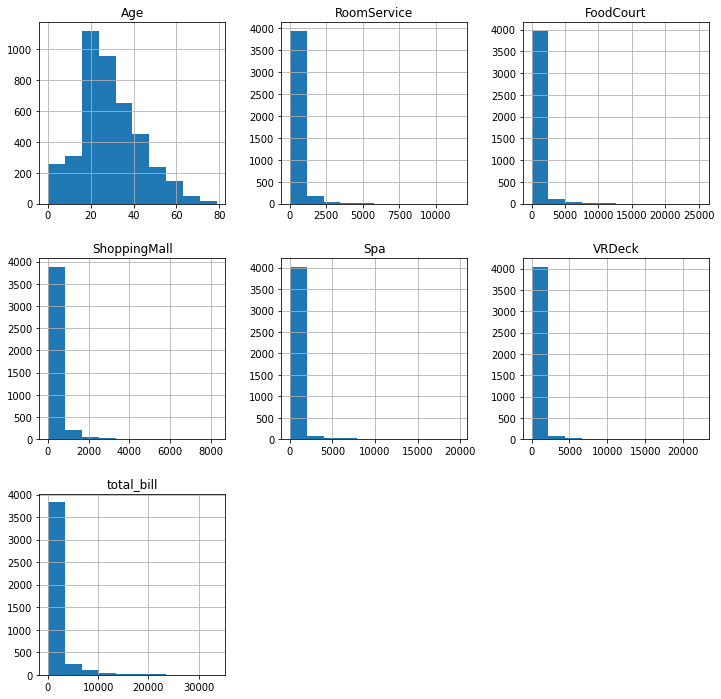

In [10]:
test_df.hist(figsize=(12, 12));

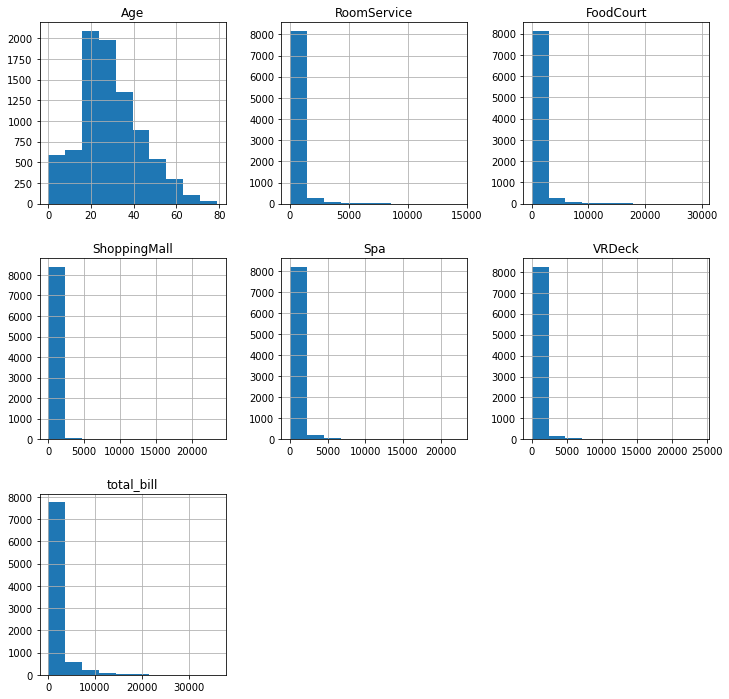

In [11]:
train_df.hist(figsize=(12, 12));

In [12]:
d = {False:0, True:1}

In [13]:
train_df['Transported'] = train_df['Transported'].map(d)

Share of transported in cryo

In [14]:
train_df[train_df['CryoSleep'] == True]['Transported'].sum() / train_df[train_df['CryoSleep'] == True]['Transported'].count() 

0.8175831412578202

Share of transported NOT in cryo

In [15]:
train_df[train_df['CryoSleep'] == False]['Transported'].sum() / train_df[train_df['CryoSleep'] == False]['Transported'].count()

0.3289207574921861

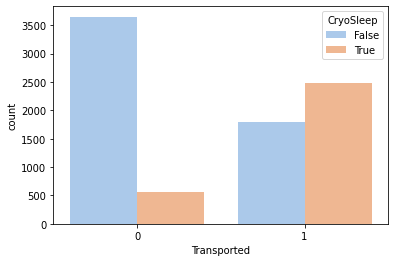

In [16]:
sns.countplot(data=train_df, x='Transported', hue='CryoSleep', palette='pastel')
sns.set_theme(style="darkgrid", rc={'figure.figsize': (6, 8)})

Distribution of transported passangers by age

<Figure size 1440x1440 with 0 Axes>

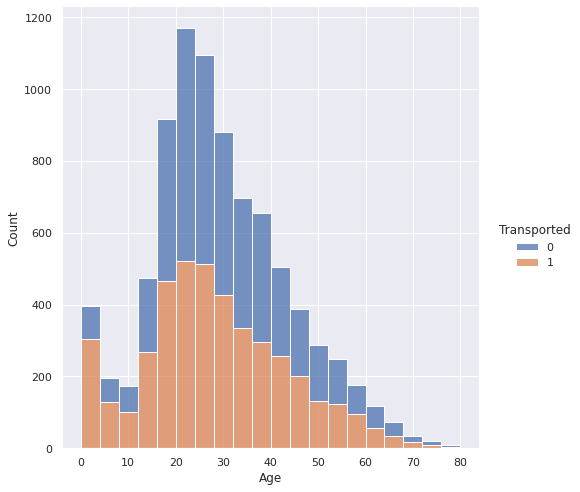

In [17]:
plt.figure(figsize=(20, 20))
sns.displot(x="Age", hue='Transported', data=train_df, height=7, multiple="stack", binwidth=4)

Create separate columns for Deck and Side from passenger`s cabin

In [18]:
train_df['Deck'] = pd.Series([i[0] if type(i) == str else i for i in list(train_df['Cabin'])])
train_df['Side'] = pd.Series([i[-1] if type(i) == str else i for i in list(train_df['Cabin'])])

In [19]:
test_df['Deck'] = pd.Series([i[0] if type(i) == str else i for i in list(test_df['Cabin'])])
test_df['Side'] = pd.Series([i[-1] if type(i) == str else i for i in list(test_df['Cabin'])])

In [20]:
cabin_transported = train_df.groupby(['Deck', 'Side'], as_index=False).agg({'Transported': 'sum'}).sort_values(by='Transported')

Distribution of transported by decks and sides

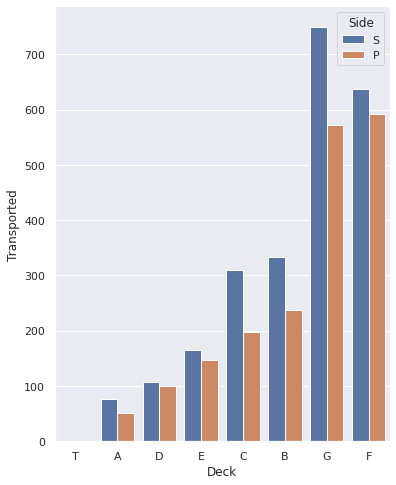

In [21]:
sns.barplot(data=cabin_transported, x='Deck', y='Transported', hue='Side');

In [22]:
newdf = train_df.groupby('Destination', as_index=False).agg({'Transported':'sum'})

In [23]:
newdf['Passangers'] = train_df.groupby('Destination', as_index=False).agg({'PassengerId':'count'})['PassengerId']

Share of transported according of destination point

In [24]:
newdf

,Destination,Transported,Passangers
0,55 Cancri e,1098,1800
1,PSO J318.5-22,401,796
2,TRAPPIST-1e,2787,5915


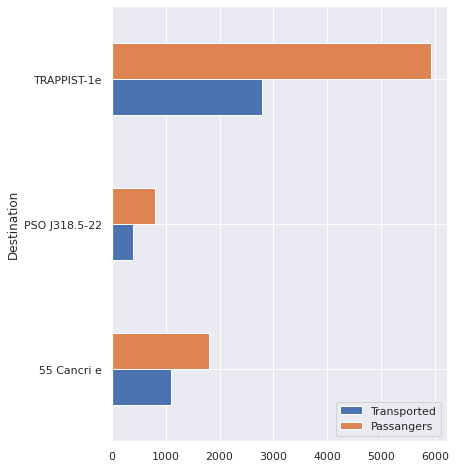

In [25]:
newdf.plot(x='Destination', kind='barh');

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
 14  total_bill    8693 non-null   float64
 15  Deck          8494 non-null   object 
 16  Side          8494 non-null   object 
dtypes: float64(7), int64(1), object(9)
memory usage: 1.1+ MB


In [27]:
train_df[['PassengerGroup', 'PassengerNo']] = train_df['PassengerId'].str.split('_', expand = True)

In [28]:
test_df[['PassengerGroup', 'PassengerNo']] = test_df['PassengerId'].str.split('_', expand = True)

In [29]:
train_df['group'] = train_df.groupby('PassengerGroup')['PassengerId'].transform('nunique')

In [30]:
test_df['group'] = test_df.groupby('PassengerGroup')['PassengerId'].transform('nunique')

In [31]:
train_df['Name'] = train_df['Name'].fillna(method='ffill')
test_df['Name'] = test_df['Name'].fillna(method='ffill')

In [32]:
train_df.head(15)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_bill,Deck,Side,PassengerGroup,PassengerNo,group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,B,P,0001,01,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,F,S,0002,01,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,A,S,0003,01,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,A,S,0003,02,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,F,S,0004,01,1
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,1,774.0,F,P,0005,01,1
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,1,1584.0,F,S,0006,01,2
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,1,0.0,G,S,0006,02,2
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,1,1018.0,F,S,0007,01,1
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,1,0.0,B,P,0008,01,3


In [33]:
list_of_groups = list(train_df['PassengerGroup'])
a = []
for i in list_of_groups:
  if list_of_groups.count(i) > 1:
    a.append(1)
  else:
    a.append(0)
train_df['has_relatives'] = pd.Series(a)

In [34]:
list_of_groups2 = list(test_df['PassengerGroup'])
b = []
for i in list_of_groups2:
  if list_of_groups2.count(i) > 1:
    b.append(1)
  else:
    b.append(0)
test_df['has_relatives'] = pd.Series(b)

In [35]:
train_df.shape, test_df.shape

((8693, 21), (4277, 20))

In [36]:
train_df_clear = train_df.drop(['Cabin', 'Name'], axis=1)
test_df_clear = test_df.drop(['Cabin', 'Name'], axis=1)

Fill na values with.mean/mode of columns


In [37]:
test_df_clear['Side'].mode() , test_df_clear['Deck'].mode(), test_df_clear['Destination'].mode(), test_df_clear['HomePlanet'].mode()

(0    S
 dtype: object, 0    F
 dtype: object, 0    TRAPPIST-1e
 dtype: object, 0    Earth
 dtype: object)

In [38]:
def filler(dataframe):
  for col in dataframe.columns:
    if dataframe[col].dtype == 'object':
      mode = dataframe[col].mode()[0]
      dataframe[col].replace(np.nan, mode, inplace=True)
    elif dataframe[col].dtype == 'int' and dataframe[col].isna().sum() > 0 and col == 'Age':
      median = dataframe[col].median()
      dataframe[col].fillna(np.nan, median, inplace=True)
    else:
      dataframe[col].fillna(0, inplace=True)
  return dataframe

In [39]:
filler(train_df_clear)
filler(test_df_clear)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_bill,Deck,Side,PassengerGroup,PassengerNo,group,has_relatives
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0.0,G,S,0013,01,1,0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,2832.0,F,S,0018,01,1,0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0.0,C,S,0019,01,1,0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,7418.0,C,S,0021,01,1,0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,645.0,F,S,0023,01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,0.0,G,S,9266,02,2,1
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,1018.0,F,S,9269,01,1,0
4274,9271_01,Mars,True,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,D,P,9271,01,1,0
4275,9273_01,Europa,False,TRAPPIST-1e,0.0,False,0.0,2680.0,0.0,0.0,523.0,3203.0,D,P,9273,01,1,0


In [42]:
test_df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     4277 non-null   object 
 1   HomePlanet      4277 non-null   object 
 2   CryoSleep       4277 non-null   bool   
 3   Destination     4277 non-null   object 
 4   Age             4277 non-null   float64
 5   VIP             4277 non-null   bool   
 6   RoomService     4277 non-null   float64
 7   FoodCourt       4277 non-null   float64
 8   ShoppingMall    4277 non-null   float64
 9   Spa             4277 non-null   float64
 10  VRDeck          4277 non-null   float64
 11  total_bill      4277 non-null   float64
 12  Deck            4277 non-null   object 
 13  Side            4277 non-null   object 
 14  PassengerGroup  4277 non-null   object 
 15  PassengerNo     4277 non-null   object 
 16  group           4277 non-null   int64  
 17  has_relatives   4277 non-null   i

Make a new columns for group size 

Text(0.5, 1.0, 'Probability of Transported by group')

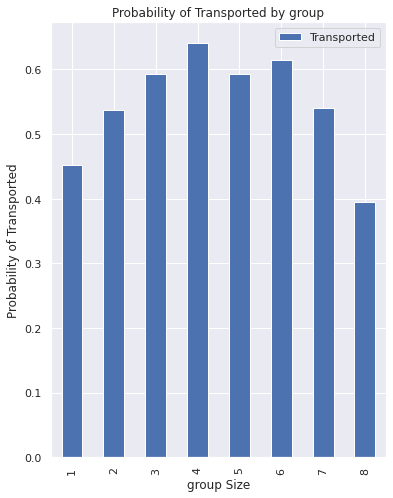

In [43]:
ax = train_df_clear.groupby('group', as_index = False).agg({'Transported': 'mean'}).plot(kind = 'bar', x = 'group', y = 'Transported')
ax.set_ylabel('Probability of Transported')
ax.set_xlabel('group Size')
ax.set_title('Probability of Transported by group')

In [44]:
train_df_clear

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_bill,Deck,Side,PassengerGroup,PassengerNo,group,has_relatives
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0,B,P,0001,01,1,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,736.0,F,S,0002,01,1,0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,10383.0,A,S,0003,01,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,5176.0,A,S,0003,02,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1091.0,F,S,0004,01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,8536.0,A,P,9276,01,1,0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0,G,S,9278,01,1,0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,1873.0,G,S,9279,01,1,0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0,4637.0,E,S,9280,01,2,1


In [45]:
train_df_clear.drop(['PassengerGroup', 'PassengerNo'], axis=1, inplace=True)
test_df_clear.drop(['PassengerGroup', 'PassengerNo'], axis=1, inplace=True)

In [46]:
train_df_clear

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_bill,Deck,Side,group,has_relatives
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0,B,P,1,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,736.0,F,S,1,0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,10383.0,A,S,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,5176.0,A,S,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1091.0,F,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,8536.0,A,P,1,0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0,G,S,1,0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,1873.0,G,S,1,0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0,4637.0,E,S,2,1


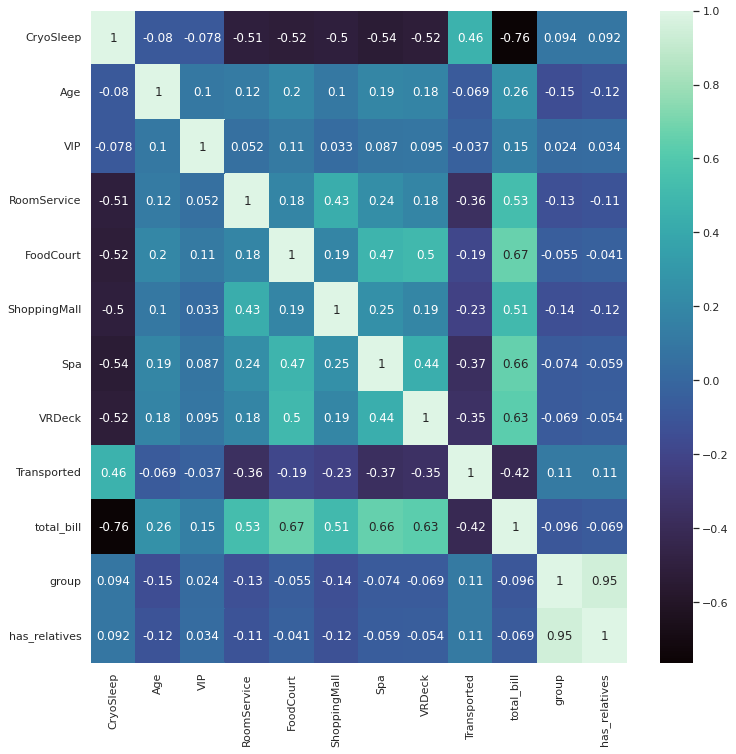

In [47]:
plt.figure(figsize=(12, 12))
sns.heatmap(data=train_df_clear.corr(method='spearman'), cmap='mako', annot=True);

In [48]:
d = {False:'0', True:'1'}

In [49]:
X, y = train_df_clear.drop(['PassengerId', 'Transported'], axis=1), train_df_clear['Transported']

In [50]:
test_df_clear['CryoSleep'] = test_df_clear['CryoSleep'].map(d)
test_df_clear['VIP'] = test_df_clear['VIP'].map(d)

In [51]:
X['CryoSleep'] = X['CryoSleep'].map(d)
X['VIP'] = X['VIP'].map(d)

In [52]:
X['has_relatives'] = X['has_relatives'].astype('str') 
test_df_clear['has_relatives'] = test_df_clear['has_relatives'].astype('str')   

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

CatBoostModel

In [54]:
from catboost import CatBoostClassifier, Pool

Make a list of categorial features for cat_features parametr

In [55]:
cat_feat = [i for i in X.columns if X[i].dtype == 'object']
cat_feat

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Deck',
 'Side',
 'has_relatives']

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
model=CatBoostClassifier()

In [69]:
cat_params = {'iterations' : [1000, 2000], 'max_depth': [5, 10],
              'l2_leaf_reg': [1, 3], 'eval_metric':['Accuracy'],
              'loss_function':['Logloss'],'learning_rate': [0.02, 0.05], 'random_seed':[42], 'verbose':[False]}

In [70]:
grid_cat = GridSearchCV(model, param_grid=cat_params, n_jobs=-1, cv=2)

In [71]:
grid_cat.fit(X_train, y_train, cat_features = cat_feat)

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f0815bce650>,
             n_jobs=-1,
             param_grid={'eval_metric': ['Accuracy'],
                         'iterations': [1000, 2000], 'l2_leaf_reg': [1, 3],
                         'learning_rate': [0.02, 0.05],
                         'loss_function': ['Logloss'], 'max_depth': [5, 10],
                         'random_seed': [42], 'verbose': [False]})

In [72]:
grid_cat.score(X_test, y_test)

0.8136503067484663

In [74]:
best_cat = grid_cat.best_estimator_

In [75]:
best_cat.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Accuracy',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 1,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Pr

In [76]:
best_cat.fit(X, y, cat_features = cat_feat)

In [77]:
X_pred = test_df_clear.drop('PassengerId', axis=1)

In [78]:
y_pred = best_cat.predict(X_pred)

In [79]:
d = {'PassengerId': test_df_clear.PassengerId, 'Transported': y_pred}

In [80]:
sample_submission = pd.DataFrame(data=d)

In [81]:
sample_submission['Transported'] = sample_submission['Transported'].astype('bool')

In [82]:
sample_submission.to_csv('submision.csv', sep=',', index=False)

In [83]:
sample_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
